In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('C:\\Users\\Dias\\Desktop\\big data\\fake_bills.csv', delimiter=';')

# Преобразование is_genuine в булев тип
df['is_genuine'] = df['is_genuine'].astype(bool)

# Вывод первых строк датасета
print(df.head())


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up   
0        True    171.81       104.86        104.95        4.52       2.89  \
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [42]:

# Анализ данных
print(df.describe())

# Проверка наличия пропущенных значений
print(df.isnull().sum())


          diagonal  height_left  height_right   margin_low    margin_up   
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000  \
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int6

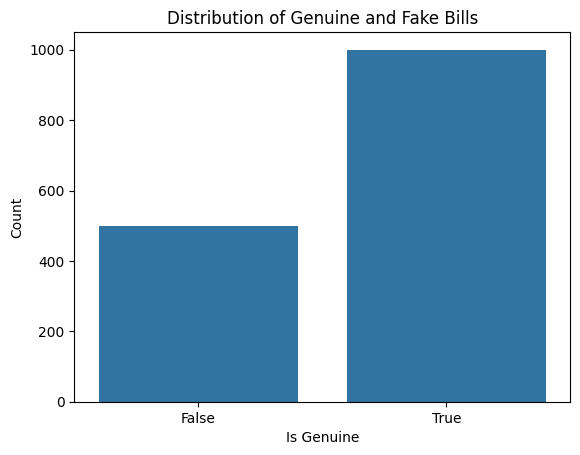

In [43]:


# Подсчет количества фальшивых и истинных купюр
fake_vs_true = df['is_genuine'].value_counts()

# Визуализация распределения
sns.barplot(x=fake_vs_true.index, y=fake_vs_true.values)
plt.title('Distribution of Genuine and Fake Bills')
plt.xlabel('Is Genuine')
plt.ylabel('Count')
plt.show()


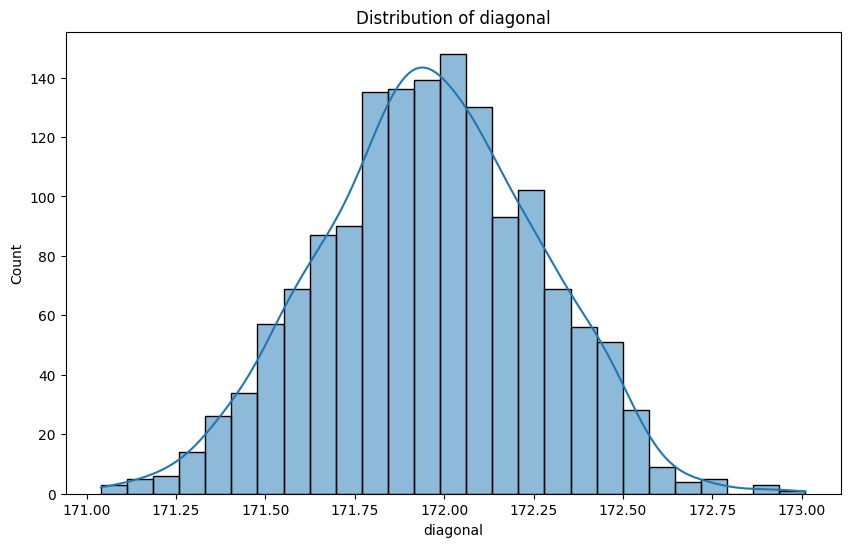

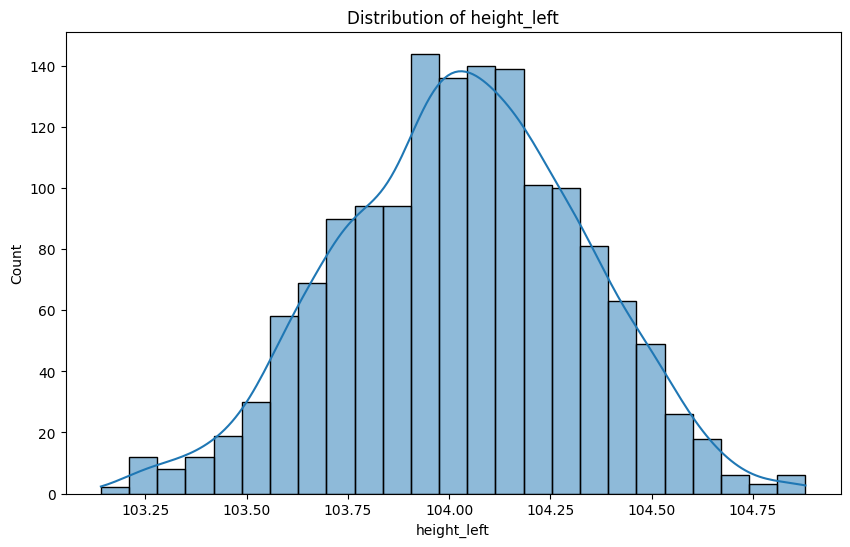

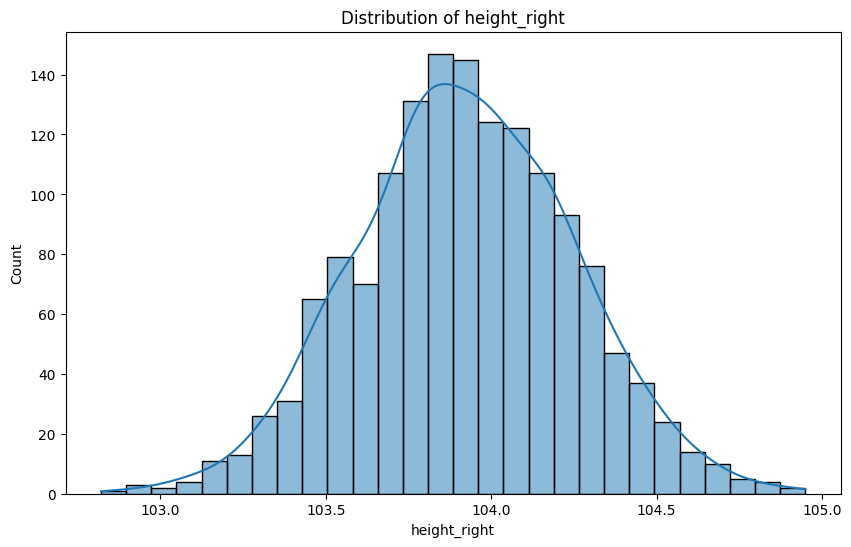

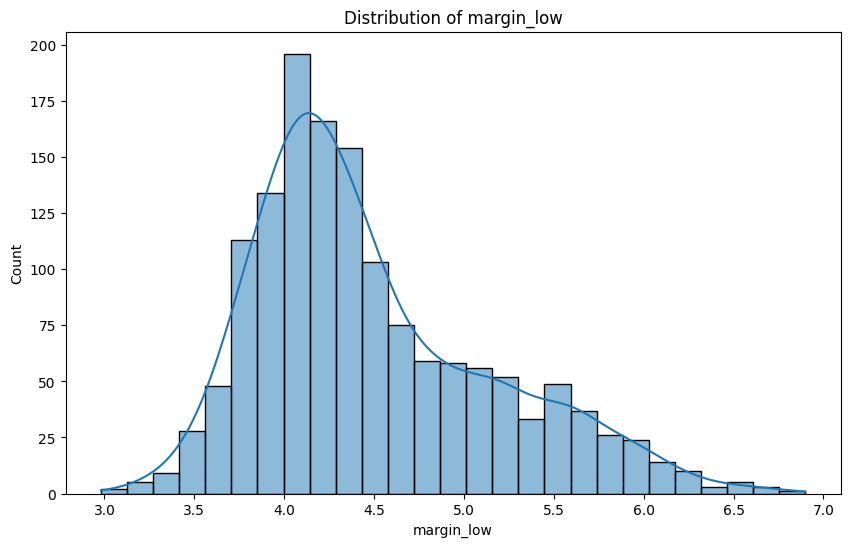

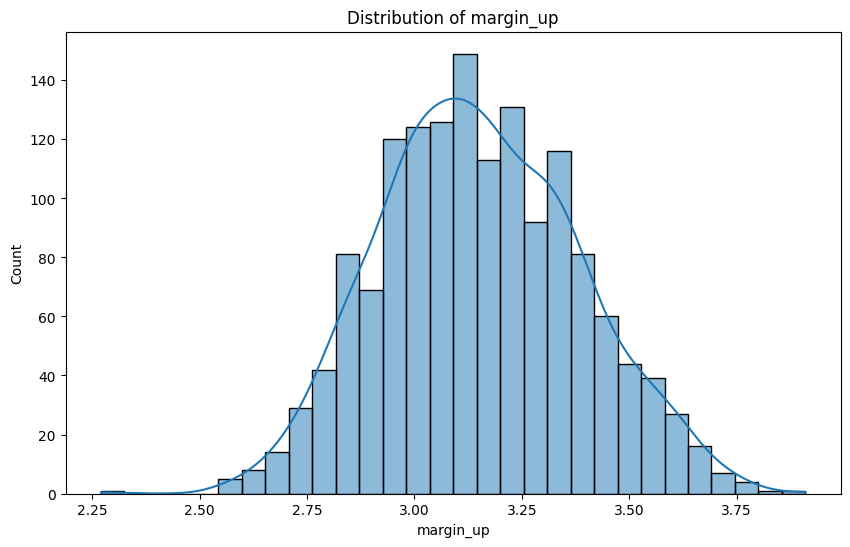

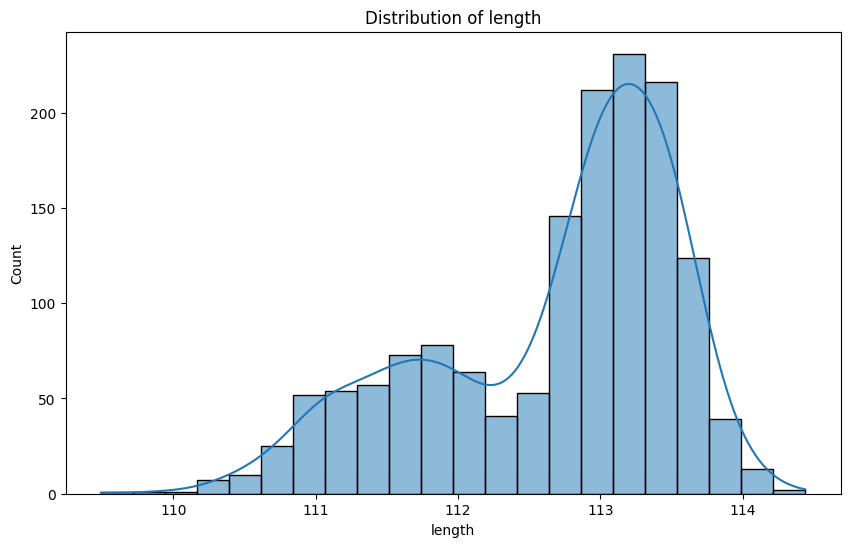

In [44]:


# Распределение параметров
for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


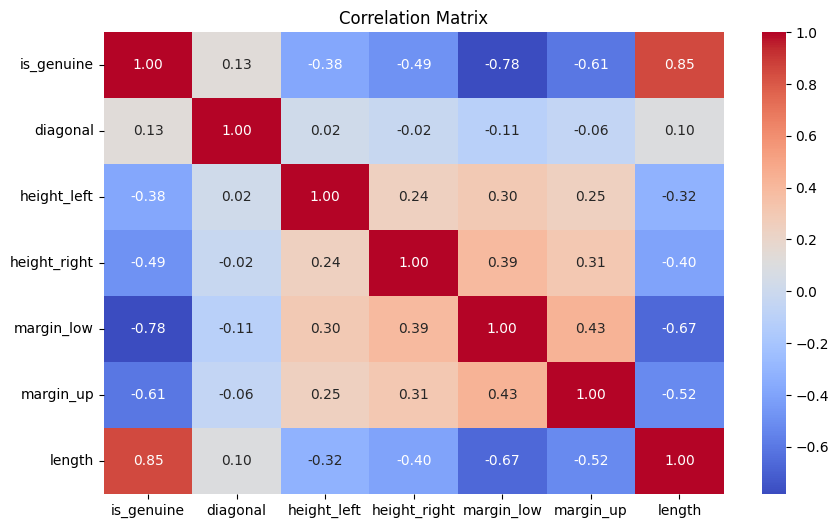

In [45]:

# Корреляционная матрица
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


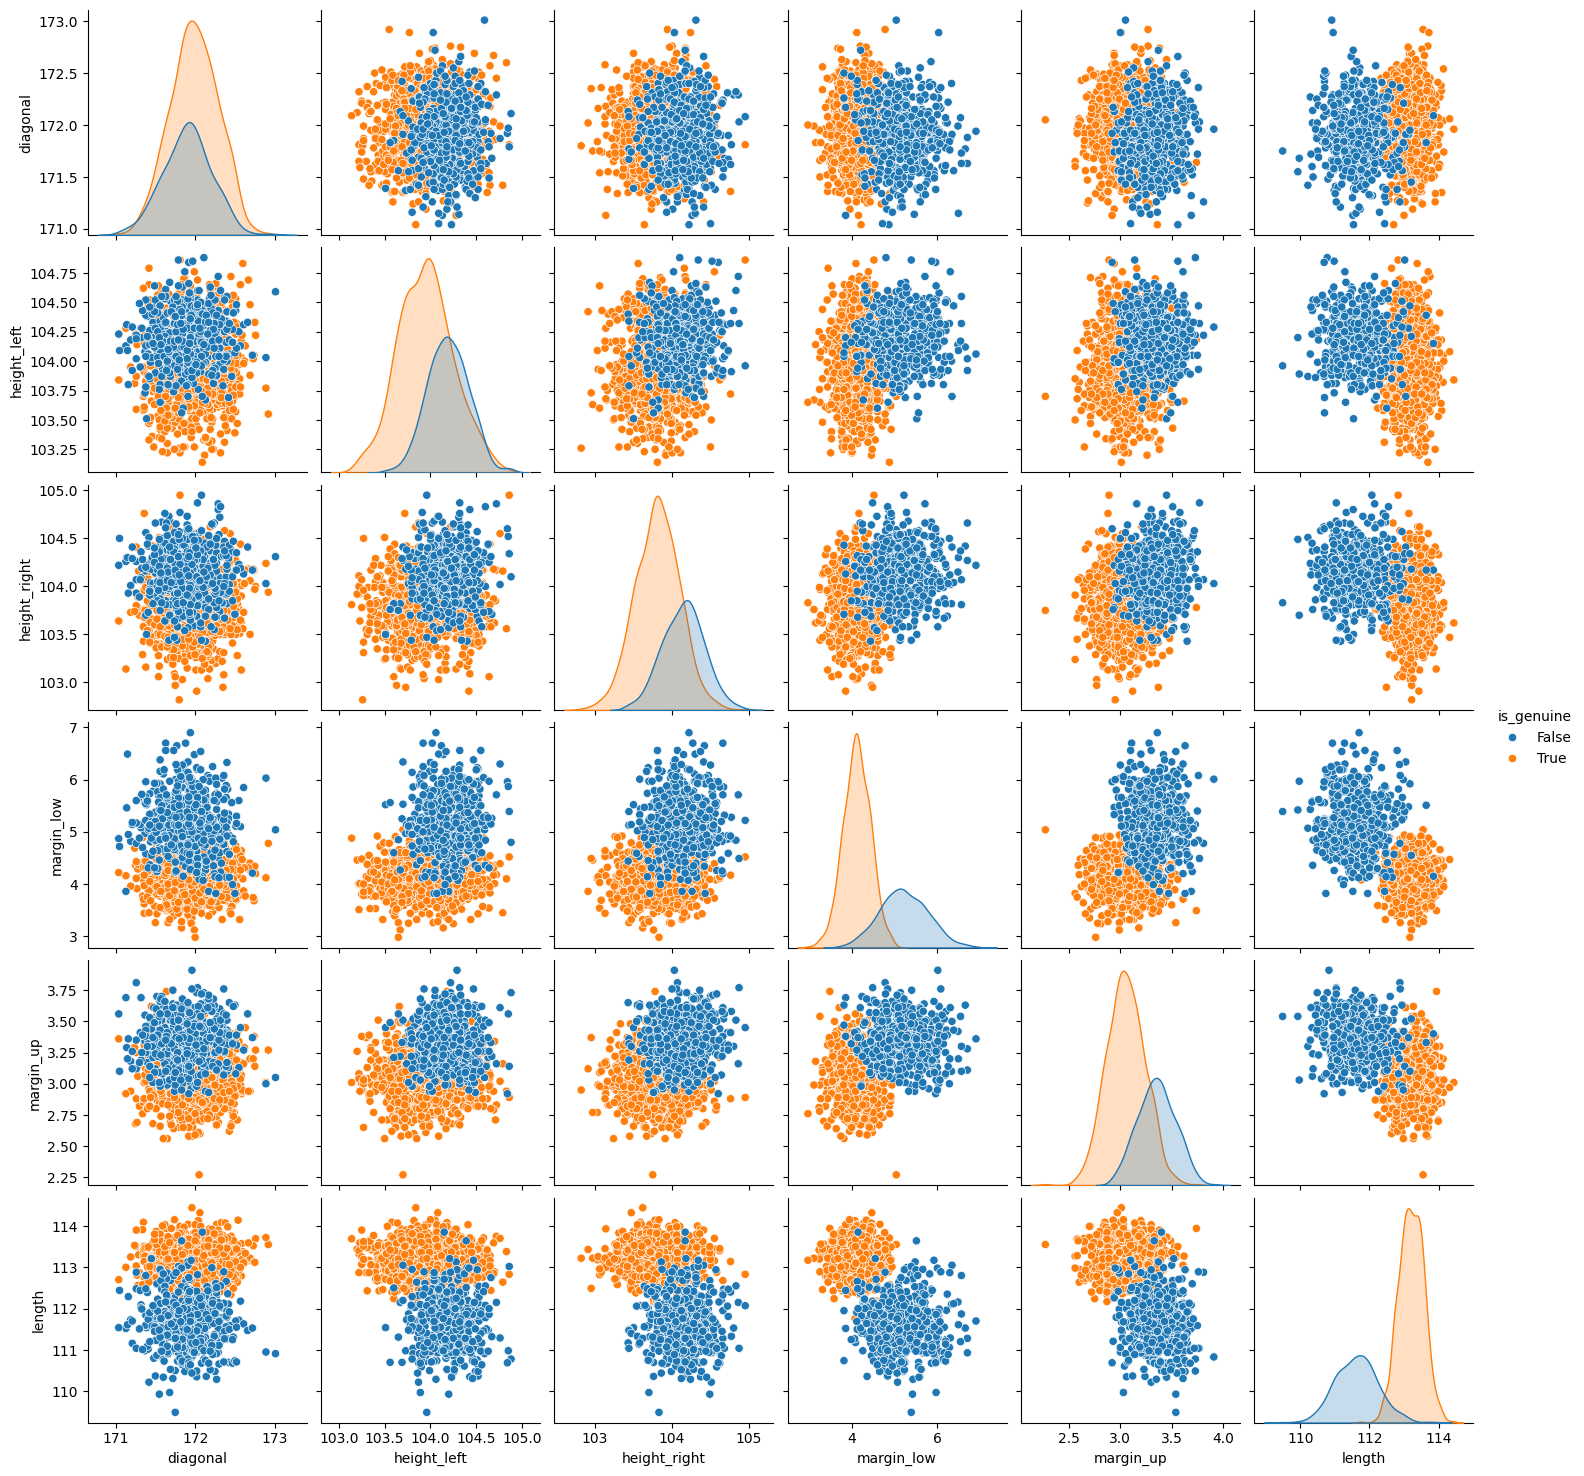

In [46]:

# Визуализация параметров
sns.pairplot(df, hue='is_genuine', height=2.5)
plt.show()


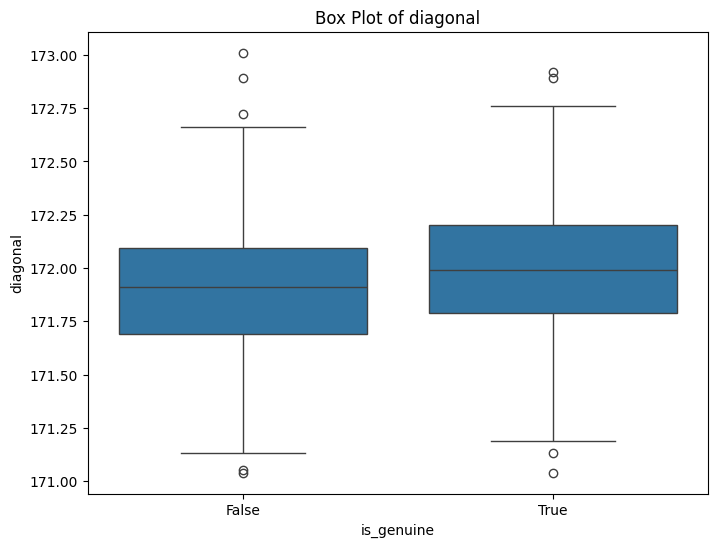

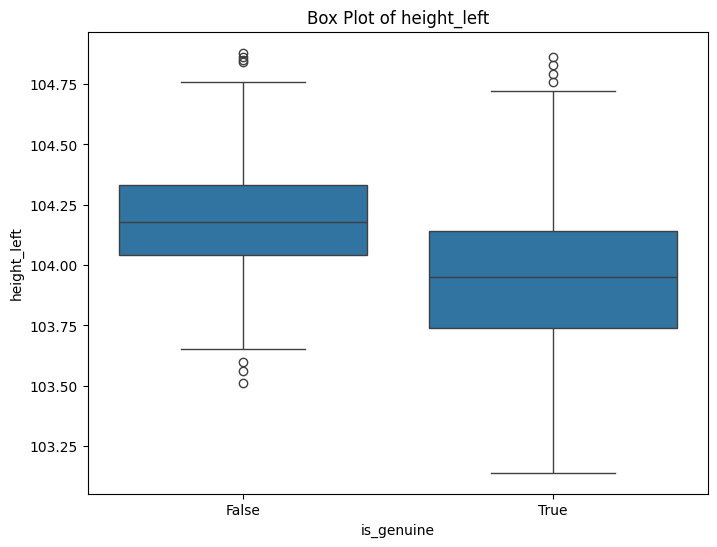

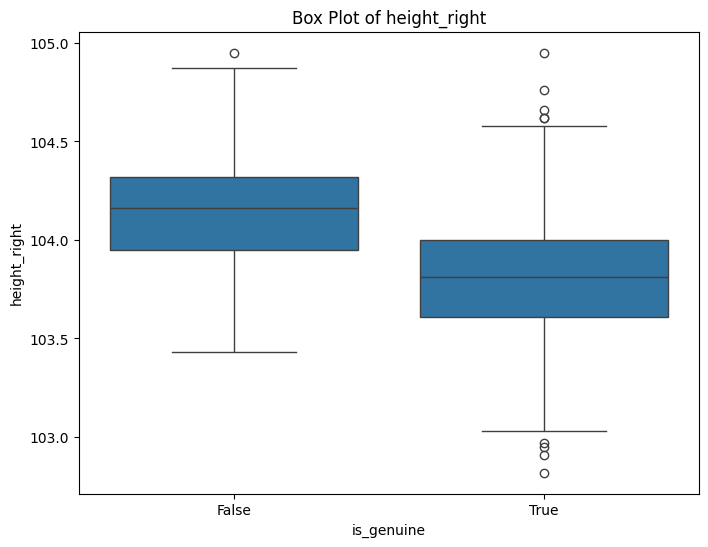

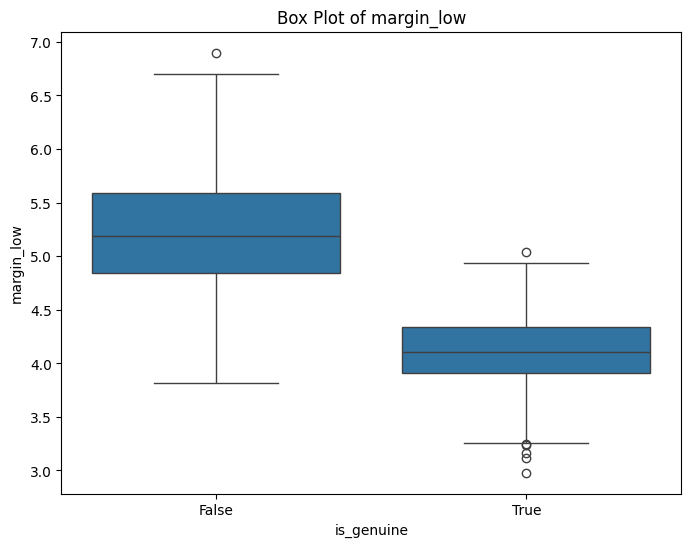

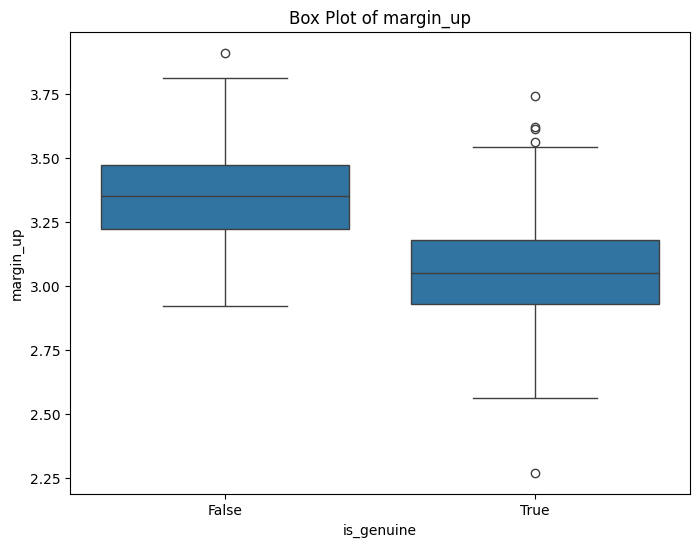

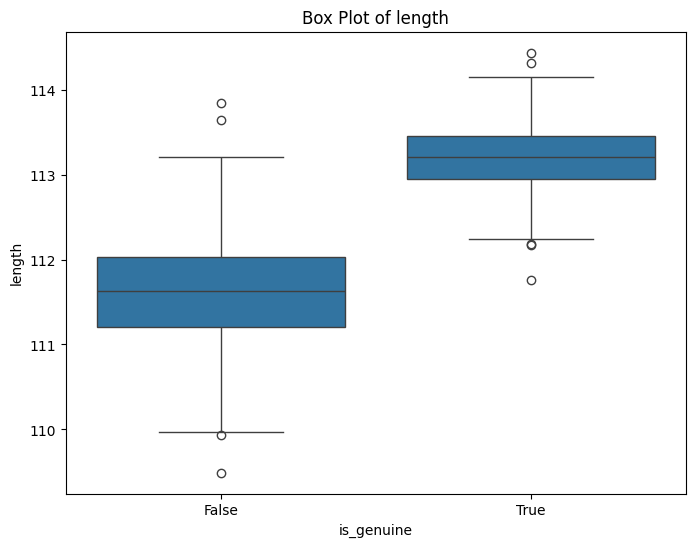

In [47]:

# Box plot для числовых признаков
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_genuine', y=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.show()


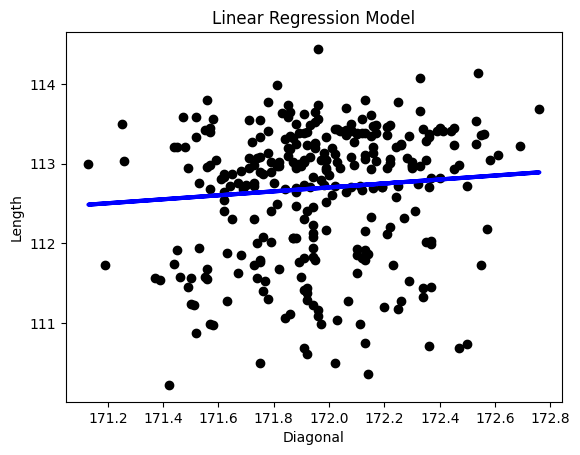

Mean Squared Error: 0.70
R-squared: 0.01


In [48]:

# Выбор переменных для регрессии
X = df[['diagonal']]
y = df['length']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Визуализация результата
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Diagonal')
plt.ylabel('Length')
plt.show()

# Вывод результатов
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

